# 1. Feature and model evaluation

In this programming demo we will cover several Python tools for analysing features and evaluating their usefulness or importance. We also look at some of the methods we have discussed around evaluating our machine learning models.

As always, we load our data an extract the values from the ```pandas.DataFrame```, and partition into training data (features), which we assign to variable ```X``` and our target values assigned to our variable ```Y```.

In [3]:
import pandas as pd

# load data
filename = './data/pima-indians-diabetes.data.csv'

header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

data = pd.read_csv(filename, names=header)

# We will extract the features using a more readable approach using the column headings
features = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
X = data[features]
Y = data['class'].values.ravel()

# You can also extract them using the previous approach withindexing:
# array = data.values
# X = array[:,0:8]
# Y = array[:,8]

# Feature Importance

Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features. There are other approaches than can also be used, but we will focus on decision trees since they are easily to implement and fast to compute. 
In addition, unlike come models, they support extracting the feature importance directly a we will see.

### Random Forests

We start with a ```RandomForestClassifier```. We fit the model by passing in our features (```X```), and target variable (```Y```).

In [4]:
from sklearn.ensemble import RandomForestClassifier

seed = 7

model = RandomForestClassifier(random_state=seed)
model.fit(X, Y)

print(model.feature_importances_)

[0.08502567 0.25442733 0.08957543 0.06894093 0.0733361  0.1654261
 0.12872407 0.13454438]


Feature importances are provided by the fitted attribute ```feature_importances_``` and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree, where the larger the score, the more important the feature.

We can plot the impurity-based importance to get a better summary of which of our features had the highest feature importance score. 

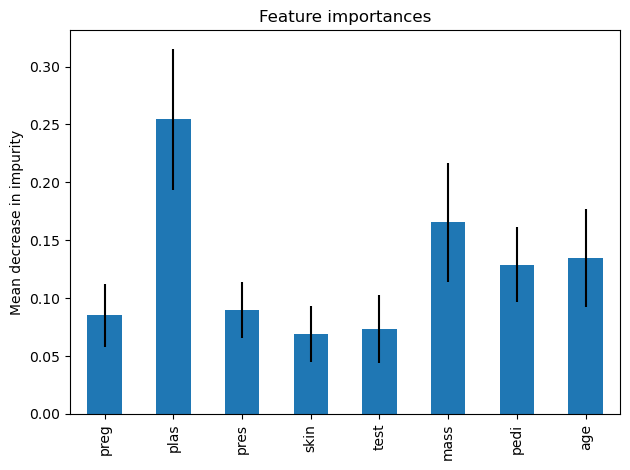

In [5]:
import numpy as np
from matplotlib import pyplot

std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

forest_importances = pd.Series(model.feature_importances_, index=features)

fig, ax = pyplot.subplots()

forest_importances.plot.bar(yerr=std, ax=ax)

ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")

fig.tight_layout()

The bars are the feature importances of the forest, along with their inter-trees variability represented by the error bars. The plot suggests that the top-3 highest scoring features are **Plasma glucose concentration (plas)**, **Body Mass Index (mass)**, and **age** in order of importance.

### ExtraTrees

In the example below we construct a ```ExtraTreesClassifier``` for the Pima Indians onset of diabetes dataset. You can learn more about the ```ExtraTreesClassifier``` class in the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html">scikit-learn API documentation</a>.

In [6]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

seed = 7

# feature extraction
model = ExtraTreesClassifier(random_state=seed)
model.fit(X, Y)

print(model.feature_importances_)

[0.10728989 0.23071238 0.09922188 0.07863772 0.07812844 0.14454899
 0.11707343 0.14438726]


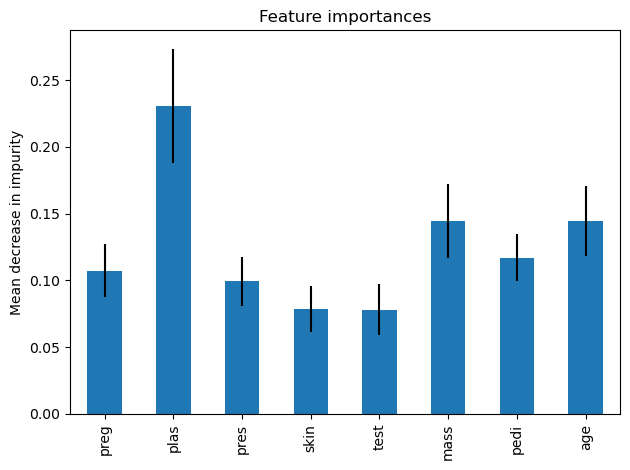

In [7]:
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

forest_importances = pd.Series(model.feature_importances_, index=features)

fig, ax = pyplot.subplots()

forest_importances.plot.bar(yerr=std, ax=ax)

ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")

fig.tight_layout()

Again, the plot suggests that the top-3 highest scoring features are **Plasma glucose concentration (plas)**, **Body Mass Index (mass)**, and **age** in order of importance.

# 2. Evaluation Metrics

The metrics that you choose to evaluate your machine learning algorithms are very important. Choice of metrics influences how the performance of machine learning algorithms is measured and compared. They influence how you weight the importance of different characteristics in the results and your ultimate choice of which algorithm to choose. 

In this demo, various algorithm evaluation metrics are demonstrated for classification type machine learning problems. 

All the approaches evaluate the same algorithms, Logistic Regression. What we call a 10-fold cross-validation test harness is used to demonstrate each metric, because this is the most likely scenario you will use when employing different algorithm evaluation metrics.

In these exercises the ```cross_validation.cross_val_score``` function is used to report the performance in each example. It does allow the use of different scoring metrics that will be discussed, but all scores are reported so that they can be sorted in ascending order (largest score is best). Some evaluation metrics (like mean squared error) are naturally descending scores (the smallest score is best) and as such are reported as negative by the cross validation (`.cross_val_score()` function). 

This is important to note, because some scores will be reported as negative that by definition can never be negative.

You can learn more about machine learning algorithm performance metrics supported by `scikit-learn` on the page <a href="https://scikit-learn.org/stable/modules/model_evaluation.htm">Model evaluation: quantifying the quality of predictions</a>.

## Classification Metrics

Classification problems are perhaps the most common type of machine learning problem and as such there is a myriad of metrics that can be used to evaluate predictions for these problems. 

In this section we will review how to use the following metrics:

- Classification Accuracy. 
- Confusion Matrix.
- Area Under ROC Curve. 
- Classification Report.

### Classification Accuracy. 

Classification accuracy is the number of correct predictions made as a ratio of all predictions made. This is the most common evaluation metric for classification problems, it is also the most misused.
<div class="alert alert-info" role="alert">
    <div class="row vertical-align">
        <div class="col-xs-1 text-center">
            <i class="fa fa-exclamation-triangle fa-2x"/>
        </div>
        <div class="col-xs-11">
            <strong> 
It is really only suitable when there are an equal number of observations in each class (which is rarely the case) and that all predictions and prediction errors are equally important, which is often not the case. 
            </strong>
        </div>
    </div>
</div>

Below is an example of calculating classification accuracy with K-fold Cross Validation.

In [8]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(solver='liblinear')

scoring = 'accuracy'

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 

print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.771 (0.051)


In [14]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier


kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = ExtraTreesClassifier(random_state=seed)

scoring = 'accuracy'

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 

print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.767 (0.055)


In [16]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = RandomForestClassifier(random_state=seed)
model.fit(X, Y)

scoring = 'accuracy'

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 

print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.768 (0.052)


## Confusion Matrix. 

The confusion matrix is a handy presentation of the accuracy of a model with two or more classes. The table presents predictions on the x-axis and accuracy outcomes on the y-axis, and the cells of the table are the number of predictions made by the given machine learning algorithm. 

For a binary classification (two classes) we have our TP for the True Positives, FN for False Negatives, FP for False Positives, and TN for True Negatives, organised into a table as follows:
<img src="./confusion_matrix.png" style="height:356px;"></img>
Below is an example of calculating a confusion matrix for a set of predictions by a Logistic Regression on the Pima Indians onset of diabetes dataset.

In [17]:
# Cross Validation Classification Confusion Matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

test_size = 0.33
seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)

predicted = model.predict(X_test)

matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[141  21]
 [ 41  51]]


In [18]:
# Cross Validation Classification Confusion Matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

test_size = 0.33
seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = RandomForestClassifier(random_state=seed)
model.fit(X_train, Y_train)

predicted = model.predict(X_test)

matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[136  26]
 [ 35  57]]


In [19]:
# Cross Validation Classification Confusion Matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

test_size = 0.33
seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = ExtraTreesClassifier(random_state=seed)
model.fit(X_train, Y_train)

predicted = model.predict(X_test)

matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[136  26]
 [ 41  51]]


## Area Under ROC Curve. 
Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems. The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. 

An area of 0.5 represents a model that is as good as random. ROC can be broken down into sensitivity and specificity. A binary classification problem is really a trade-off between sensitivity and specificity.

- Sensitivity is the true positive rate also called the recall. It is the number of instances from the positive (first) class that actually predicted correctly: $TPR = \frac{TP}{TP+FN}$
- Specificity is also called the true negative rate. Is the number of instances from the negative (second) class that were actually predicted correctly: $FPR = \frac{FP}{FP+TN}$

Since an ROC curve is a plot of the true positive rate against the false positive rate for the different 
possible cutpoints of a diagnostic test, it demonstrates several things:
   - It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
   - The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
   - The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.
   - The slope of the tangent line at a cutpoint gives the likelihood ratio (LR) for that value of the test. 
   - The area under the curve is a measure of test accuracy.
   
Accuracy is measured by the area under the ROC curve. An area of 1 represents a perfect test; an area of .5 represents a worthless test. A rough guide for classifying the accuracy of a diagnostic test is the traditional academic point system: 

   - .90 -> 1 = excellent (A)
   - .80 -> .90 = good (B)
   - .70 -> .80 = fair (C)
   - .60 -> .70 = poor (D)
   - .50 -> .60 = fail (F)

In [10]:
# Cross Validation Classification ROC AUC
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

model = LogisticRegression(solver='liblinear')

scoring = 'roc_auc'

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.826 (0.050)


We can plot a ROC curve for a model in Python using the ```roc_curve()``` scikit-learn function. The function takes both the true outcomes (0,1) from the test set and the predicted probabilities for the 1 class. The function returns the **false positive** rates for each threshold, **true positive** rates for each threshold and thresholds. 

The AUC for the ROC can be calculated using the ```roc_auc_curve()``` function. Like the ```roc_curve()``` function, the AUC function takes both the true outcomes (0,1) from the test set and the predicted probabilities for the 1 class. It returns the AUC score between 0.0 and 1.0 for no skill and perfect skill respectively. 

In [11]:
# Cross Validation Classification ROC AUC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, Y, test_size=0.1, random_state=2)

# fit a model
model = LogisticRegression(solver='liblinear')
model.fit(trainX, trainy)

# predict probabilities
probs = model.predict_proba(testX)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)

AUC: 0.808


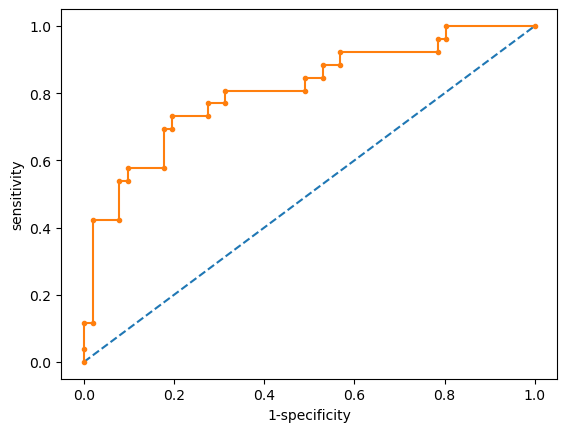

In [12]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)

# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')

pyplot.ylabel("sensitivity")
pyplot.xlabel("1-specificity")

pyplot.show()


## Classification Report. 

The scikit-learn library provides a convenience report when working on classification problems to give you a quick idea of the accuracy of a model using a number of measures. The ```classification_report()``` function displays the precision, recall, F1-core and support for each class. 

The example below demonstrates the report on the binary classification problem.

In [13]:
# Cross Validation Classification Report
from sklearn.metrics import classification_report

test_size = 0.33
seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)

predicted = model.predict(X_test)

report = classification_report(Y_test, predicted)

print(report)

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       162
           1       0.71      0.55      0.62        92

    accuracy                           0.76       254
   macro avg       0.74      0.71      0.72       254
weighted avg       0.75      0.76      0.75       254



In [20]:
# Cross Validation Classification Report
from sklearn.metrics import classification_report

test_size = 0.33
seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = RandomForestClassifier(random_state=seed)
model.fit(X_train, Y_train)

predicted = model.predict(X_test)

report = classification_report(Y_test, predicted)

print(report)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       162
           1       0.69      0.62      0.65        92

    accuracy                           0.76       254
   macro avg       0.74      0.73      0.73       254
weighted avg       0.76      0.76      0.76       254



## Conclusion
You cannot know which algorithm will work best on your dataset beforehand. You must use trial and error to discover a shortlist of algorithms that do well on your problem that you can then double down on and tune further. I call this process spot-checking. 

The question is not: What algorithm should I use on my dataset? Instead it is: What algorithms should I spot-check on my dataset? You can guess at what algorithms might do well on your dataset, and this can be a good starting point. I recommend trying a mixture of algorithms and see what is good at picking out the structure in your data.